# TP NLP 

This lab is based on the NLP lab from Ecole polytechnique.

## 0. Words embedding

In this lab, you will discover words embedding through several tasks such as translation or classification. The first step will be to download pretrained embeddings. To do so, you have to run the following cells.

In [0]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-05-27 01:21:18--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.205.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.205.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  13.6MB/s    in 1m 57s  

2020-05-27 01:23:17 (13.4 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
from gensim.models import KeyedVectors
import numpy as np

In [0]:

#Run this cell only to test if you have correctedly downloaded the data.

EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

#Use the following line to assert that the Word2Vec data is available
print(word2vec.word_vec("test")[:10])

#Once you get the expected results, you don't have to run this cell again.
del word2vec

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[-0.14257812 -0.03686523  0.13574219 -0.06201172  0.07958984  0.01904297
 -0.08154297 -0.12792969 -0.02954102  0.23632812]


## 1. Word2Vec applied to English Vocabulary

We will use this embeddings to evaluate similarities between words. These tests will also help us to evaluate the quality of the embedding. To do so, we are going to use the given Word2Vec class. The structure of the class has been created (init and load_wordvec methods) but you'll have to complete the two following methods :

*   *most_similar :* Compute the K most similar words to a given word

    Input : a word w and the expected number of outputs K

    Output : The K closest numbers according to the score function

*   *score :* Compute the cosine similarity between two vectors 

    Input : two words w1 and w2

    Output : Cosine similarities between the two vectors corresponding to the two inputs




In [0]:
from collections import Counter
from scipy import spatial

class Word2vec():
    def __init__(self, fname):
        self.load_wordvec(fname)
        self.vocab = self.word2vec.vocab.keys()
    
    def load_wordvec(self, fname):
        self.word2vec = KeyedVectors.load_word2vec_format(fname, binary=True, limit = 500000)

    def most_similar(self, w, K=5):
        # TODO 
        #make loop over english vocabulary (self.vocab) compute score call score

        closest_numbers = [0 for i in range(K+1)]
        words = [0 for i in range(K+1)]

        for iterLoop in range(K+1):
          for keys in self.vocab:
            s = self.score(w, keys)
            if iterLoop == 0:
              if (s>closest_numbers[iterLoop]):
                closest_numbers[iterLoop] = s
                words[iterLoop] = keys, closest_numbers[iterLoop]
            else:
              if (s>closest_numbers[iterLoop] and s<closest_numbers[iterLoop-1]):
                closest_numbers[iterLoop] =  s
                words[iterLoop] = keys, closest_numbers[iterLoop]

        del words[0] #it will find itself, so we disregard that

        return words
    def score(self, w1, w2):
        # TODO (help : np.linalg.norm will return the norm of a vector) cosine simularity

        vec1 = self.word2vec.word_vec(w1)
        # print(w1, ": ", vec1)
        vec2 = self.word2vec.word_vec(w2)

        cos_sim = (np.sum(vec1*vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))
        
        return cos_sim


In [0]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
w2v = Word2vec(EMBEDDING_FILE)
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Run the following cell to evaluate your model. You don't have to modify this cell.

In [0]:
# You will be evaluated on the output of the following:
for w1, w2 in zip(('cat', 'dog', 'dogs', 'paris', 'germany'), ('dog', 'pet', 'cats', 'france', 'berlin')):
    print(w1, w2, w2v.score(w1, w2))
for w1 in ['cat', 'dog', 'dogs', 'paris', 'germany']:
    print(w2v.most_similar(w1))

cat dog 0.76094574
dog pet 0.71647847
dogs cats 0.7651765
paris france 0.5550795
germany berlin 0.5539934
[('cats', 0.80993795), ('dog', 0.76094574), ('kitten', 0.74649847), ('feline', 0.7326235), ('beagle', 0.7150583)]
[('dogs', 0.868049), ('puppy', 0.81064284), ('pit_bull', 0.780396), ('pooch', 0.76273763), ('cat', 0.76094574)]
[('dog', 0.868049), ('canines', 0.8181711), ('cats', 0.7651765), ('pit_bulls', 0.75483024), ('pets', 0.7424417)]
[('london', 0.5555775), ('france', 0.5550795), ('dubai', 0.5532332), ('rome', 0.5465838), ('toronto', 0.5457153)]
[('german', 0.6809574), ('europe', 0.6781216), ('european', 0.65021104), ('sweden', 0.638424), ('france', 0.63143545)]


You can compare your results with the method *most_similar_cosmul* that uses another solution to compute the most similar words :

In [0]:
for w1 in ['cat', 'dog', 'dogs', 'paris', 'germany']:
  print(w2v.word2vec.most_similar_cosmul(w1))

[('cats', 0.9049681425094604), ('dog', 0.8804720044136047), ('kitten', 0.8732484579086304), ('feline', 0.8663108348846436), ('beagle', 0.8575283288955688), ('puppy', 0.8537718653678894), ('pup', 0.8467137217521667), ('pet', 0.8445757627487183), ('felines', 0.8377957940101624), ('chihuahua', 0.8354873061180115)]
[('dogs', 0.9340235590934753), ('puppy', 0.9053205847740173), ('pit_bull', 0.8901971578598022), ('pooch', 0.8813680410385132), ('cat', 0.8804720044136047), ('golden_retriever', 0.8750442862510681), ('German_shepherd', 0.8732578754425049), ('Rottweiler', 0.8718799352645874), ('beagle', 0.8709302544593811), ('pup', 0.8703446984291077)]
[('dog', 0.9340235590934753), ('canines', 0.9090846180915833), ('cats', 0.8825874328613281), ('pit_bulls', 0.8774142861366272), ('pets', 0.8712201118469238), ('puppies', 0.8692987561225891), ('pooches', 0.8581174612045288), ('German_shepherds', 0.8535523414611816), ('animals', 0.8492838740348816), ('pit_bull', 0.8491798639297485)]
[('london', 0.7777

The first cell (the one not with the method most_similiar_cosmul) is less accruate by about 0.1-0.15 than the second cell. 

## 2. Bag of Words

A quick solution to implement in NLP is Bag of Words. This means that we are going to consider the whole sentences without any word order. We are going to compute two solutions, one with idf and one without idf. 

First, we need to download the dataset. We are going to use the dataset from IMDB based on movie reviews.

In [0]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=100000)

17465344/17464789 [==============================] - 3s 0us/step


In [0]:
INDEX_FROM = 3
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0] if id > 2))

1646592/1641221 [==============================] - 1s 1us/step
this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile fo

In [0]:
truncated_sentences = []

for sent_ind in range(1000):
  sentence = [id_to_word[id] for id in x_train[sent_ind] if id > 2]
  truncated_sentences.append(sentence[:15])

print(truncated_sentences[0])

['this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part']


You will have to complete the following class. The methods are given but you'll have to complete them.

*   *encode* : Encode the sentences with a Bag of Words algorithm using a simple mean or using an idf-weighted mean

  Input : sentences to encode, a boolean defining if we are goinf to use the idf-weighted method.

  Output : A matrix with the sentences embedding

*   *most_similar* : Find the K most similar sentences in the corpus.

  Input : a sentence s that need to be matched, a dataset of sentences, the idf boolean for the method and the number K of sentences to return

  Output : The K most similar sentences

*   *score :* Compute the cosine similarity between two vectors 

    Input : two words w1 and w2

    Output : Cosine similarities between the two vectors corresponding to the two inputs

*   *build_idf* : Compute an idf dictionnary with all the weights

  $$idf(word, corpus) =  max(1, log_{10}(\frac{length(sentences)}{count(word)}))$$

    Input : Sentences from the corpus

    Output : A dictionnary with words as keys and weights as values



In [0]:
import statistics

def sortSecond(val): 
    return val[1] 

class BoV():
    def __init__(self, w2v):
        self.w2v = w2v
    def encode(self, sentences, idf=False):

        sentemb = []  
        for sent in sentences:
          mean_vector = []
          idf_vector = []
          #index = 0  

          if idf is False:
            
            for word in sent:
              
              #print(word)
              if word in word2vec.vocab:
                word_embed = word2vec.word_vec(word)
                mean_vector = mean_vector + [word_embed]
              else:
                if len(mean_vector) == 0:
                  mean_vector = mean_vector + [0]
            
            sentemb.append(sum(mean_vector)/len(mean_vector))
            
            
          else:
            
            for word in sent:
              if word in word2vec.vocab:
                word_embed = word2vec.word_vec(word)
                idf_vector = idf_vector + [idf[word.lower()]*(sum(word_embed)/len(word_embed))]
              else:
                idf_vector = idf_vector + [idf[word.lower()]]
            
            sentemb.append(sum(idf_vector)/len(idf_vector))
         
        return np.vstack(sentemb)

    def most_similar(self, s, sentences, idf=False, K=5):
        keys = self.encode(sentences, idf)
        query = self.encode([s], idf)

        score_tab = []
        i = 0
        for key in keys:

          score_tab.append((sentences[i], self.score(query,key)))
          i = i + 1
        
        score_tab.sort(key = sortSecond, reverse=True)
        
        return score_tab[:K]

    def score(self, s1, s2, idf=False):

        cos_sim = np.dot(s1, s2)/np.linalg.norm(s1) * np.linalg.norm(list(s2))
        return cos_sim
    
    def build_idf(self, sentences): #for each word, calculate the max of 1log and so on, compute the encode, then most_similar and score
        idf = {}

        for sent in sentences:
          for word in sent:
            word_count = 0
            target_word = word
            for sent2 in sentences:
              word_count = word_count + sent2.count(target_word)
            idf[target_word] = np.maximum(1, np.log10(len(sentences)/word_count))
    
        return idf

In [0]:
s2v = BoV(w2v)

In [0]:
idf = s2v.build_idf(truncated_sentences)

Run the following cell and comment your result. Is that the output you expected ? To what extent, the similar sentence is good enough according to you ?

This output is not what I expected, seeing as the first few sentences do not seem to be condemning the movie. Idf appears to work much better than non idf, with idf at least producing some negative critiques of the movie. The output is thus not exactly what I expected for non idf, but for idf it does appear to be good enough. 

In [0]:
#You will be evaluated on the output of the following lines. You need to print the 5 most_similar sentences.
most_similar_sentences = s2v.most_similar("This was the worst movie I ever seen in my life".split(" "), truncated_sentences)
print(most_similar_sentences)
most_similar_sentences_idf = s2v.most_similar("This was the worst movie I ever seen in my life".split(" "), truncated_sentences, idf)
print(most_similar_sentences_idf)

[(['oh', 'my', 'god', 'i', 'bought', 'this', 'movie', 'and', 'i', 'watched', 'the', 'whole', 'thing', 'okay', "it's"], array([1.2397451], dtype=float32)), (['wow', 'what', 'would', 'you', 'do', 'with', '33m', 'let', 'me', 'give', 'you', 'a', 'choice', 'you', 'can'], array([1.1543801], dtype=float32)), (['i', 'think', 'that', 'this', 'movie', 'is', 'very', 'fun', 'and', 'horror', 'i', 'love', 'elvira', 'and', 'i'], array([1.1539967], dtype=float32)), (['this', 'movie', 'is', 'terrible', 'terrible', 'one', 'of', 'the', 'worst', 'movies', 'ever', 'i', 'cannot', 'even', 'imagine'], array([1.1418922], dtype=float32)), (['i', 'loved', 'this', 'movie', 'i', 'am', 'biased', 'seeing', 'as', 'i', 'am', 'a', 'huge', 'disney', 'fan'], array([1.1119549], dtype=float32))]
[(['the', 'brak', 'show', 'is', 'good', 'probably', 'not', 'in', 'the', 'same', 'level', 'than', 'aqua', 'teen', 'hunger'], array([0.00019243])), (['netflix', 'should', 'mention', 'this', 'short', 'feature', 'on', 'the', 'info', 'f

## 3. Translation

One task that you can expect from an NLP application is to compute a quick translation. Creating advanced tools for translation is hard but there is an easy way to translate. We are going to compute a quick translation thanks to projection. We start from the assumption that the two languages have more or less the same shape. So with a simple mapping we should be able to translate automatically.

You can visualise it with the gif from [here](https://engineering.fb.com/ai-research/unsupervised-machine-translation-a-novel-approach-to-provide-fast-accurate-translations-for-more-languages/). 

### Mapping

Let's consider a bilingual dictionary (e.g French-English).

Let's define **X** and **Y** the **French** and **English** matrices.

They contain the embeddings associated to the words in the bilingual dictionary.

We want to find a **mapping W** that will project the source word space (e.g French) to the target word space (e.g English).

We want to find : $$W^* = argmin || W.X - Y || \text{ such that } W^T.W = Id$$

Fortunately, the problem has a closed form solution:
$$W = U.V^T  \text{ where }  U.\Sigma.V^T = SVD(Y.X^T)$$


First we need to download the data. Because of the limited RAM in google colab, we are going to only use the part of the model that we need. You have to run the following cells. It will take some time.

WARNING : Bedore running the following cells, you should restart the the environnement to assert that your RAM is empty. It will clear the variables from the previous part. Otherwise, you might exceed the limitation.


In [5]:
!wget -P /root/input/ -c https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz
!wget -P /root/input/ -c https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz


--2020-05-27 19:35:57--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4a8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-05-27 19:36:00--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4a8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



Run time taking forever for unknown reasons. 

In [2]:
!gunzip -k /root/input/cc.fr.300.bin.gz
!gunzip -k /root/input/cc.en.300.bin.gz

gzip: /root/input/cc.fr.300.bin already exists; do you wish to overwrite (y or n)? y
gzip: /root/input/cc.en.300.bin already exists; do you wish to overwrite (y or n)? 

KeyboardInterrupt: ignored

In [0]:
import gensim.models

In [0]:
ft = gensim.models.FastText.load_fasttext_format('/root/input/cc.fr.300.bin')  # Original fasttext embeddings from https://fasttext.cc/
ft.wv.save('/root/input/gensim_fasttext_fr.model')
#del ft

In [1]:
ft = gensim.models.FastText.load_fasttext_format('/root/input/cc.en.300.bin')  # Original fasttext embeddings from https://fasttext.cc/
ft.wv.save('/root/input/gensim_fasttext_en.model')
#del ft

NameError: ignored

In [0]:
ft_french = gensim.models.KeyedVectors.load('/root/input/gensim_fasttext_fr.model')
ft_english = gensim.models.KeyedVectors.load('/root/input/gensim_fasttext_en.model')

You can now test your model contained in ft_french and ft_english.

In [0]:
#You can test if your model is working

#print(ft_french.words[:10])   # list of words in dictionary
print(ft_french['roi']) # get the vector of the word 'king'

Now we can start the translation. The first step is to define the X and Y matrix. Instead of computing the whole vocabulary, we are going to use a trick. We need to assert that the words are in the same position in X and Y. 

For the example if "dog" is the 100th word in X, "chien" should be the 100th word. To do so, we are going to use transparent words only. We have the strong assumption that if a word exists in both languages it should have the same meaning in both of them.

Compute the intersection of the two vocabulary and store the first **20000 common words** with their embeddings in X and Y. 

In [0]:
X = {}
Y = {}

#TODO
count=0;
condition=False
for fw in ft_french.vocab:
  if condition:
    break;
  for ew in ft_english.vocab:
    if fw==ew:
      X[fw]=ft_french[fw];
      Y[ew]=ft_english[ew];
      count+=1;  
      if count==20000: #20,000 most common words
        condition=True
        break;


Now compute W with the given close form. The shape of W should be (300, 300)

In [0]:
import scipy.linalg
import numpy as np

#TODO
Xmat=[]
Ymat=[]
for x in X.values():
    Xmat.append(x)
for y in Y.values():
    Ymat.append(y)

Xmat= np.array(Xmat)
Ymat= np.array(Ymat)

print(Xmat.shape)
print(Ymat.shape)

u,s,wt = np.linalg.svd(np.dot(Ymat,Xmat.T),full_matrices=False) 
W = np.dot(u,wt)

W.resize(300, 300) #resize to 300,300
print(W.shape)

Run the following cell and comment your result. Is that the output you expected ? Why ?

In [0]:
K = 5

#You will be evaluated on the following outputs

def score(value1, value2):
  return np.dot(value1, value2)/(np.linalg.norm(value1)*np.linalg.norm(value2))

print("French to English : ")
print()
for w1 in ['souris', 'travailler', 'rue', 'pays']:
    # Compute the projection of each word and find the 5 closest word in the English vocabulary
    print()#Print the list of the 5 best outputs for each word

print()
print("English to French : ")
for w2 in ['cat', 'target', 'city', 'free']:
    # Compute the projection of each word and find the 5 closest word in the French vocabulary
    print()#Print the list of the 5 best outputs for each word


WARNING : When you have finished the previous part, you can delete the two model to free the RAM before the next part. Don't delete them before you have finished the previous question, otherwise, you'll have to recompute all the downloading part.

In [0]:
del ft_french
del ft_english

## 4. Classification

We are now starting the Deep Learning part with a classification task. We have a dataset from IMDB with movie reviews. We are going to build a simple classifier. The objective is to make a binary classifier to separate positive from negative reviews.

In [0]:
import numpy as np
import tensorflow as tf
top_words = 5000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=top_words)

In [0]:
max_review_length = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_review_length)

The first model that you need to compute is a simple feed forward neural network.

- Use the following layers to build your network
  - An embedding layer with top_words = 5000, an embedding vector length of 32 and a max reviex length of 500
  - A fully-connected layer with 16 units and a ReLU activiation function
  - An output fully-connected layer with one unit and a Sigmoid activation function.
- Compile the generator using binary crossentropy loss and the Adam optimizer 
- Train on the data with 20 epochs
- Compute the accuracy with model.evaluate
- Plot the history of the loss versus the epoch number

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

model = Sequential()
model.add(Embedding(5000, 32, input_length = 500))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=20,
)

results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6892 - accuracy: 0.5194
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6878 - accuracy: 0.5235
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6877 - accuracy: 0.5216
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6877 - accuracy: 0.5227
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6876 - accuracy: 0.5213
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6876 - accuracy: 0.5221
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6876 - accuracy: 0.5245
Epoch 8/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6876 - accuracy: 0.5205
Epoch 9/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6875 - accuracy: 0.5220
Epoch 10/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6876 - accuracy: 0.5243

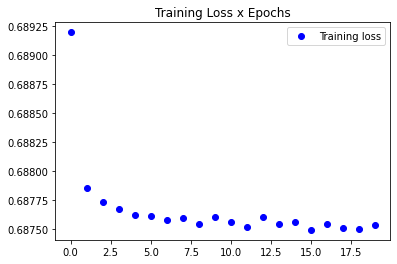

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training Loss x Epochs')
plt.legend()

plt.show()

The second model will be based on LSTMs.

- Use the following layers to build your network
  - An embedding layer with top_words = 5000, an embedding vector length of 32 and a max reviex length of 500
  - A Dropout layer with dropout ratio of 0.2
  - An LSTM layer with 100 units
  - A Dropout layer with dropout ratio of 0.2
  - An output fully-connected layer with one unit and a Sigmoid activation function.
- Compile the generator using binary crossentropy loss and the Adam optimizer 
- Train on the data with 3 epochs
- Compute the accuracy with model.evaluate
- Plot the history of the loss versus the epoch number

In [0]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#TODO
model = Sequential()
model.add(Embedding(5000, 32, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=3,)
results = model.evaluate(X_test, y_test, batch_size=128)

print('test loss, test acc:', results)

Epoch 1/3
782/782 [==============================] - 20s 25ms/step - loss: 0.4669 - accuracy: 0.7721
Epoch 2/3
782/782 [==============================] - 20s 25ms/step - loss: 0.3036 - accuracy: 0.8764
Epoch 3/3
196/196 [==============================] - 3s 13ms/step - loss: 0.3892 - accuracy: 0.8352
test loss, test acc: [0.3892463147640228, 0.8352400064468384]


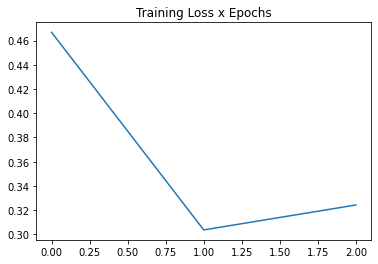

In [0]:
train_loss = history.history['loss']

plt.plot(train_loss)
plt.title('Training Loss x Epochs')
plt.show()